## ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [2]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
# torch
import torch 

In [5]:
# ÌèâÍ∞ÄÏßÄÌëú
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [6]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
# font manager
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# tqdm
from tqdm import tqdm

In [9]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [10]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("ÏÇ¨Ïö©Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§:", device)

ÏÇ¨Ïö©Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§: cuda


In [11]:
print("CUDA ÏÇ¨Ïö© Í∞ÄÎä•?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("ÏÇ¨Ïö© Ï§ëÏù∏ GPU:", torch.cuda.get_device_name(0))
else:
    print("GPUÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

CUDA ÏÇ¨Ïö© Í∞ÄÎä•? True
ÏÇ¨Ïö© Ï§ëÏù∏ GPU: NVIDIA GeForce MX450


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
import re

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 682.7 kB/s eta 0:00:19
     ---------------------------------------- 0.1/12.8 MB 1.2 MB/s eta 0:00:12
     ---------------------------------------- 0.1/12.8 MB 1.0 MB/s eta 0:00:13
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Data Load

In [22]:
pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
path = kagglehub.dataset_download("datasnaek/youtube-new")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\wonny\.cache\kagglehub\datasets\datasnaek\youtube-new\versions\115


In [24]:
# Load USvideo Dataset
df = pd.read_csv(os.path.join(path, "USvideos.csv"))

In [25]:
df.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ‚ñ∂ \n\nSUBSCRIBE ‚ñ∫ http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

## Data preprocessing

### function definition

In [27]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()

    # 2. ÌäπÏàòÎ¨∏Ïûê, Ïà´Ïûê Ï†úÍ±∞
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy ÌòïÌÉúÏÜå Î∂ÑÏÑù
    doc = nlp(text)

    # 4. Î™ÖÏÇ¨/ÌòïÏö©ÏÇ¨ + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + ÏõêÌòï Î≥µÏõê
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)


In [28]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()

    # 2. ÌäπÏàòÎ¨∏Ïûê, Ïà´Ïûê Ï†úÍ±∞ (ÏïåÌååÎ≤≥Îßå ÎÇ®ÍπÄ)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy Î∂ÑÏÑù
    doc = nlp(text)

    # 4. Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + Î™ÖÏÇ¨/ÌòïÏö©ÏÇ¨ + ÏõêÌòï Î≥µÏõê
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [66]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [29]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # ÍµêÏßëÌï©
    return ' '.join(common) if common else ''

### category mapping

In [30]:
# Category mapping 
# json file
json_path = os.path.join(path, "US_category_id.json")

# Json load
with open(json_path, 'r', encoding = 'utf-8') as f:
    category_json = json.load(f)

category_mapping = {
    int(item['id']): item['snippet']['title']
    for item in category_json['items']}

In [31]:
# Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨ ÌôïÏù∏
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [32]:
df['category_name'] = df['category_id'].map(category_mapping)

In [33]:
df['category_name']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40949, dtype: object

In [34]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Ïàò ÌôïÏù∏ 
category_counts = df['category_name'].value_counts().sort_values(ascending = True)

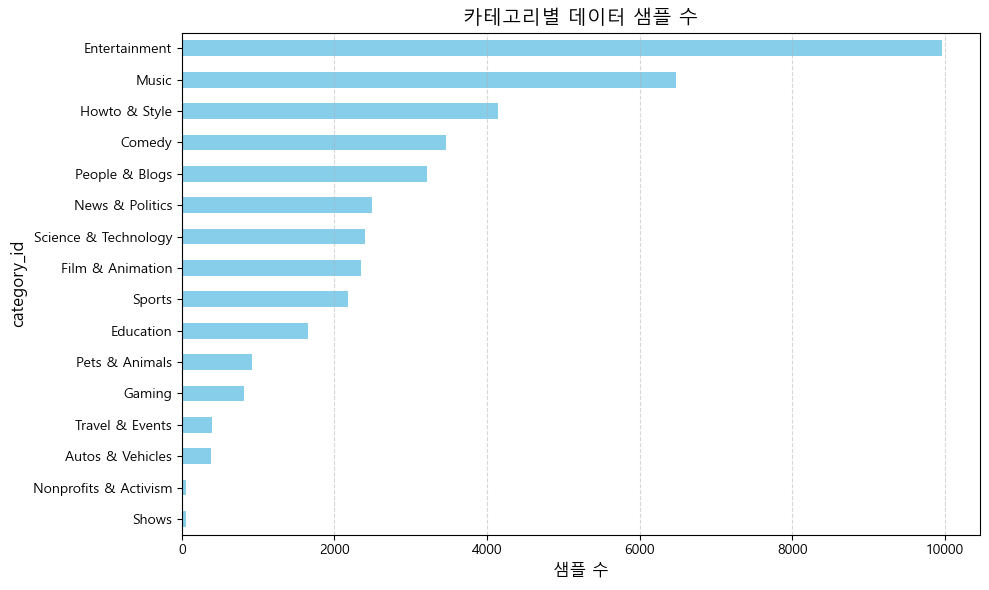

In [35]:
plt.figure(figsize=(10,6))
category_counts.plot(kind='barh', color='skyblue')

plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Ïàò", fontsize=14)
plt.xlabel("ÏÉòÌîå Ïàò", fontsize=12)
plt.ylabel("category_id", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### category filtering

In [36]:
# category filtering
cat_name = 'Gaming'
game_data = df[df['category_name'] == cat_name].copy()

In [37]:
game_data

video_id trending_date  \
131    lsfzA7sWlOM      17.14.11   
392    lsfzA7sWlOM      17.15.11   
405    EEIP1YpFXrE      17.16.11   
619    EEIP1YpFXrE      17.17.11   
652    hXcoq5XDwyA      17.17.11   
...            ...           ...   
40874  9jRtpMKLsts      18.14.06   
40911  tn0hCTyj2Kc      18.14.06   
40919  vDyYMcjf500      18.14.06   
40936  Xr2rgT9uEnA      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
131                 L.A. Noire - Nintendo Switch Trailer   
392                 L.A. Noire - Nintendo Switch Trailer   
405                                       Our First Date   
619                                       Our First Date   
652                         Playing CUPHEAD with MatPat!   
...                                                  ...   
40874  Pok√©mon: Let's Go, Pikachu! and Pok√©mon: Let's...   
40911        The Sims 4 Seasons: Official Reveal Trailer   
40919  The History of Fortnite Battle Royale - Did Yo...   
40936              LIE DETECTOR TEST WITH MY GIRLFRIEND!   
40948  Official Call of Duty¬Æ: Black Ops 4 ‚Äî¬†Multipla...   

                              channel_title  category_id  \
131                                Nintendo           20   
392                                Nintendo           20   
405                            iHasCupquake           20   
619                            iHasCupquake           20   
652                           Butch Hartman           20   
...                                     ...          ...   
40874  The Official Pok√©mon YouTube channel           20   
40911                              The Sims           20   
40919                     DidYouKnowGaming?           20   
40936                            miniminter           20   
40948                          Call of Duty           20   

                   publish_time  \
131    2017-11-09T19:59:48.000Z   
392    2017-11-09T19:59:48.000Z   
405    2017-11-15T20:00:00.000Z   
619    2017-11-15T20:00:00.000Z   
652    2017-11-15T22:02:34.000Z   
...                         ...   
40874  2018-05-30T01:22:17.000Z   
40911  2018-05-24T16:59:24.000Z   
40919  2018-05-24T19:00:24.000Z   
40936  2018-05-20T18:00:02.000Z   
40948  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
131    nintendo|"play"|"play nintendo"|"game"|"gamepl...    154872    7683   
392    nintendo|"play"|"play nintendo"|"game"|"gamepl...    161231    7803   
405    first date|"animation"|"animated"|"short"|"sho...    224426   17784   
619    first date|"animation"|"animated"|"short"|"sho...    463992   25840   
652    game theory|"film theory"|"cuphead"|"don't dea...     55460    3871   
...                                                  ...       ...     ...   
40874  Pok√©mon|"Pokemon"|"Pok√©mon Let's Go"|"Pok√©mon ...   9992803  230507   
40911  The Sims 4|"The Sims 4 Trailer"|"Sims 4 Traile...   1749832   77408   
40919  fortnite|"fortnite pc"|"fortnite battle royale...    324219    7840   
40936  miniminter|"mm7games"|"simon"|"random"|"lie de...   3229540  109945   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
131         164           1734   
392         169           1479   
405         225           2762   
619         509           3708   
652          96            428   
...         ...            ...   
40874     24911          60041   
40911      1392          18242   
40919      1333           1257   
40936      3062           6774   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
131    https://i.ytimg.com/vi/lsfzA7sWlOM/default.jpg              False   
392    https://i.ytimg.com/vi/lsfzA7sWlOM/default.jpg              False   
405    https://i.ytimg.com/vi/EEIP1YpFXrE/default.jpg              False   
619    https://i.ytimg.com/vi/EEIP1YpFXrE/default.jpg 

In [38]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 131 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                817 non-null    object
 1   trending_date           817 non-null    object
 2   title                   817 non-null    object
 3   channel_title           817 non-null    object
 4   category_id             817 non-null    int64 
 5   publish_time            817 non-null    object
 6   tags                    817 non-null    object
 7   views                   817 non-null    int64 
 8   likes                   817 non-null    int64 
 9   dislikes                817 non-null    int64 
 10  comment_count           817 non-null    int64 
 11  thumbnail_link          817 non-null    object
 12  comments_disabled       817 non-null    bool  
 13  ratings_disabled        817 non-null    bool  
 14  video_error_or_removed  817 non-null    bool  
 15  descrip

In [39]:
game_df = game_data[['title', 'views', 'likes', 'description']]
game_df.head(5)

title   views  likes  \
131  L.A. Noire - Nintendo Switch Trailer  154872   7683   
392  L.A. Noire - Nintendo Switch Trailer  161231   7803   
405                        Our First Date  224426  17784   
619                        Our First Date  463992  25840   
652          Playing CUPHEAD with MatPat!   55460   3871   

                                           description  
131  Amid the post-war boom of Hollywood's Golden A...  
392  Amid the post-war boom of Hollywood's Golden A...  
405  Here's an animation short of our First Date! W...  
619  Here's an animation short of our First Date! W...  
652  After my appearance on GTLive, MatPat (Game Th...

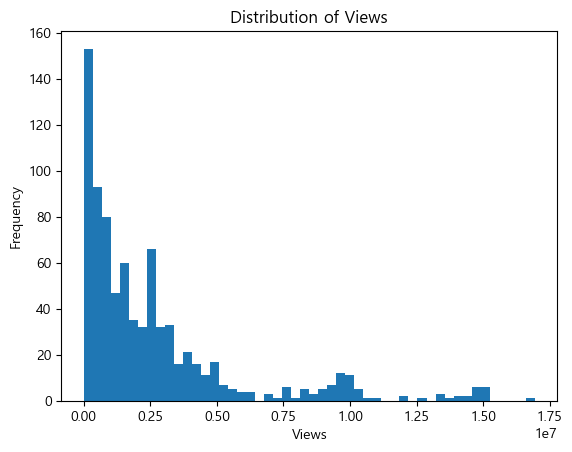

In [40]:
# target Î∂ÑÌè¨ ÌôïÏù∏ 
plt.hist(game_df['views'], bins=50)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

C:\Users\wonny\AppData\Local\Temp\ipykernel_19820\1121708721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['log_views'] = np.log1p(game_df['views'])


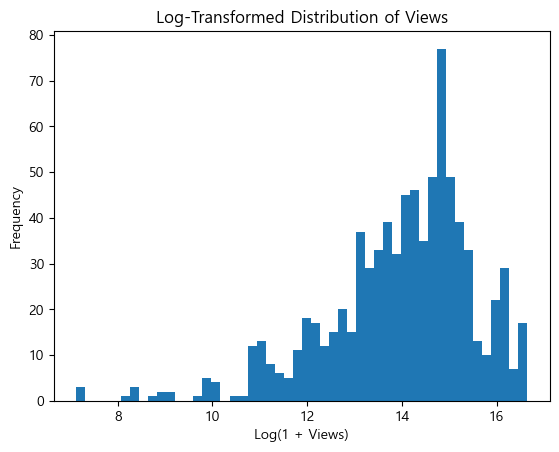

In [41]:
# target log scaling 
game_df['log_views'] = np.log1p(game_df['views'])

plt.hist(game_df['log_views'], bins=50)
plt.xlabel('Log(1 + Views)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Views')
plt.show()

In [42]:
# log_views Ïó¥ÏùÑ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
game_df['log_views_scaled'] = scaler.fit_transform(game_df[['log_views']])

C:\Users\wonny\AppData\Local\Temp\ipykernel_19820\3972654438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['log_views_scaled'] = scaler.fit_transform(game_df[['log_views']])


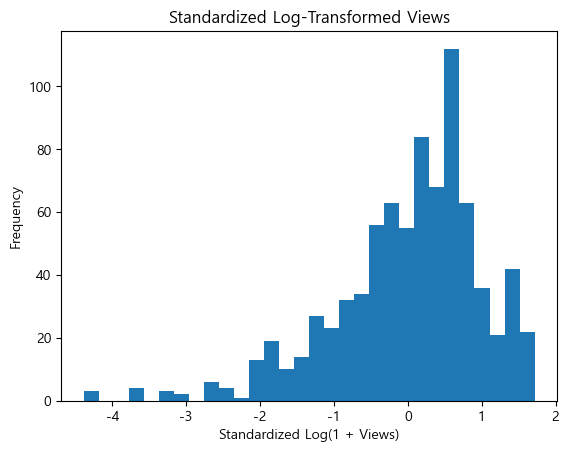

In [43]:
plt.hist(game_df['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

### Ï†úÎ™© Ï†ÑÏ≤òÎ¶¨ 

In [44]:
game_df['cleaned_title'] = game_df['title'].apply(preprocess_title)

C:\Users\wonny\AppData\Local\Temp\ipykernel_19820\3908585635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['cleaned_title'] = game_df['title'].apply(preprocess_title)


In [45]:
game_df['cleand_desc'] = game_df['description'].apply(preprocess_description)

C:\Users\wonny\AppData\Local\Temp\ipykernel_19820\2892365416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['cleand_desc'] = game_df['description'].apply(preprocess_description)


In [46]:
game_df.head(5)

title   views  likes  \
131  L.A. Noire - Nintendo Switch Trailer  154872   7683   
392  L.A. Noire - Nintendo Switch Trailer  161231   7803   
405                        Our First Date  224426  17784   
619                        Our First Date  463992  25840   
652          Playing CUPHEAD with MatPat!   55460   3871   

                                           description  log_views  \
131  Amid the post-war boom of Hollywood's Golden A...  11.950361   
392  Amid the post-war boom of Hollywood's Golden A...  11.990600   
405  Here's an animation short of our First Date! W...  12.321306   
619  Here's an animation short of our First Date! W...  13.047625   
652  After my appearance on GTLive, MatPat (Game Th...  10.923435   

     log_views_scaled                     cleaned_title  \
131         -1.291706  la noire nintendo switch trailer   
392         -1.265922  la noire nintendo switch trailer   
405         -1.054013                              date   
619         -0.588606                              date   
652         -1.949735               play cuphead matpat   

                                           cleand_desc  
131  postwar boom hollywood golden age cole phelp l...  
392  postwar boom hollywood golden age cole phelp l...  
405  here animation short date excited hear think l...  
619  here animation short date excited hear think l...  
652  appearance gtlive matpat game theory play cuph...

### ÌíàÏÇ¨Î≥Ñ count

In [146]:
# Í∞Å Ï†úÎ™©ÏóêÏÑú ÌíàÏÇ¨Î≥Ñ Í∞úÏàò Ï∂îÏ∂ú
pos_df = game_df['title'].apply(count_pos).apply(pd.Series)

# Í∏∞Ï°¥ dfÏôÄ Ìï©ÏπòÍ∏∞
game_df = pd.concat([game_df, pos_df], axis=1)

In [147]:
game_df

title     views   likes  \
131                 L.A. Noire - Nintendo Switch Trailer    154872    7683   
392                 L.A. Noire - Nintendo Switch Trailer    161231    7803   
405                                       Our First Date    224426   17784   
619                                       Our First Date    463992   25840   
652                         Playing CUPHEAD with MatPat!     55460    3871   
...                                                  ...       ...     ...   
40874  Pok√©mon: Let's Go, Pikachu! and Pok√©mon: Let's...   9992803  230507   
40911        The Sims 4 Seasons: Official Reveal Trailer   1749832   77408   
40919  The History of Fortnite Battle Royale - Did Yo...    324219    7840   
40936              LIE DETECTOR TEST WITH MY GIRLFRIEND!   3229540  109945   
40948  Official Call of Duty¬Æ: Black Ops 4 ‚Äî¬†Multipla...  10306119  357079   

                                             description  log_views  \
131    Amid the post-war boom of Hollywood's Golden A...  11.950361   
392    Amid the post-war boom of Hollywood's Golden A...  11.990600   
405    Here's an animation short of our First Date! W...  12.321306   
619    Here's an animation short of our First Date! W...  13.047625   
652    After my appearance on GTLive, MatPat (Game Th...  10.923435   
...                                                  ...        ...   
40874  Return to the Kanto region and experience a cl...  16.117376   
40911  Add weather to your Sims‚Äô lives to tell new st...  14.375031   
40919  Thanks to Skillshare for sponsoring this video...  12.689178   
40936  Talia: https://www.youtube.com/user/nataliahad...  14.987851   
40948  Call of Duty: Black Ops 4 Multiplayer raises t...  16.148248   

       log_views_scaled                                      cleaned_title  \
131           -1.291706                   la noire nintendo switch trailer   
392           -1.265922                   la noire nintendo switch trailer   
405           -1.054013                                               date   
619           -0.588606                                               date   
652           -1.949735                                play cuphead matpat   
...                 ...                                                ...   
40874          1.378417        pokmon let pikachu pokmon let eevee trailer   
40911          0.261964                sims season official reveal trailer   
40919         -0.818290  history fortnite battle royale know game feat ...   
40936          0.654644                       lie detector test girlfriend   
40948          1.398199  official duty black op multiplayer reveal trailer   

                                             cleand_desc  NOUN  PROPN  ADJ  \
131    postwar boom hollywood golden age cole phelp l...     2      4    0   
392    postwar boom hollywood golden age cole phelp l...     2      4    0   
405    here animation short date excited hear think l...     1      0    1   
619    here animation short date excited hear think l...     1      0    1   
652    appearance gtlive matpat game theory play cuph...     1      1    0   
...                                                  ...   ...    ...  ...   
40874  return kanto region experience classic pokmon ...     2      3    0   
40911  add weather sim live tell new story enjoy seas...     3      0    1   
40919  thank skillshare sponsor video people sign lin...     4      1    1   
40936  talia httpswwwyoutubecomusernataliahaddockjosh...     4      0    0   
40948  duty black op multiplayer raise bar famed mult...     6      0    2   

       VERB  INTJ  NUM  
131       0     0    0  
392       0     0    0  
405       0     0    0  
619       0     0    0  
652       1     0    0  
...     ...   ...  ...  
40874     4     0    0  
40911     1     0    1  
40919     2     0    0  
40936     0     0    0  
40948     1     0    1  

[817 rows x 14 columns]

### Ï°∞ÌöåÏàò ÏÉÅÏúÑ ÏòÅÏÉÅÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÌôïÏù∏

--------------------------------------------------------------------------------------------------------

Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄ ÏòÅÏÉÅÎì§ÏóêÏÑú ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÌôïÏù∏ÌïòÍ∏∞ (tf-idf)

In [107]:
# Ï°∞ÌöåÏàò Í∏∞Ï§Ä ÏÉÅÏúÑ ÏòÅÏÉÅ vs ÌïòÏúÑ ÏòÅÏÉÅ ÎπÑÍµê 
top_df = game_df[game_df['views'] >= game_df['views'].quantile(0.90)].copy()
bottom_df = game_df[game_df['views'] >= game_df['views'].quantile(0.10)].copy()

In [108]:
## tf-idf
# Î≤°ÌÑ∞Ìôî Í∞ùÏ≤¥ ÏÉùÏÑ±
vectorizer = TfidfVectorizer(
    stop_words='english',      # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    max_features=1000,         # ÏÉÅÏúÑ 5000Í∞úÏùò Îã®Ïñ¥Îßå ÏÇ¨Ïö©
    ngram_range=(1, 2)         # unigram + bigram ÏÇ¨Ïö©
)

In [112]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

In [113]:
# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(30))

                  word     score
6                clash  8.922829
49              royale  8.905378
8         clash royale  8.905378
56             trailer  7.655398
33            official  7.255476
0                black  7.053768
13                duty  7.053768
27         multiplayer  7.053768
28  multiplayer reveal  7.053768
1             black op  7.053768
34       official duty  7.053768
14          duty black  7.053768
37      op multiplayer  7.053768
36                  op  7.053768
46              reveal  7.053768
47      reveal trailer  7.053768
25                meet  6.659609
44              rascal  6.659609
45          rascal new  6.659609
29                 new  6.659609
51         royale meet  6.659609
26         meet rascal  6.659609
30            new card  6.659609
2                 card  6.659609
20                 let  5.598334
43          pokmon let  5.598334
42              pokmon  5.598334
3                 clan  5.423804
59                 war  5.264746
50        

-----------------------------------------------------------------------------------------------------------

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï∂úÌòÑ ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Îã®Ïñ¥Îì§ ÌôïÏù∏ÌïòÍ∏∞ (countvectorizer) 

In [115]:
#CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(top_df['cleaned_title']) 

# Îã®Ïñ¥Î≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
word_counts = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# Ï†ïÎ¶¨
count_df = pd.DataFrame({'word': words, 'count': word_counts})
count_df = count_df.sort_values('count', ascending=False)

In [116]:
count_df

word  count
27      trailer     38
3         clash     35
24       royale     33
16     official     28
22       reveal     25
13  multiplayer     25
17           op     25
0         black     25
6          duty     25
20       pokmon     24
10          let     24
12         meet     21
14          new     21
1          card     21
21       rascal     21
2          clan     14
18      pikachu     12
29          war     12
7         eevee     12
11         look      6
9          labo      6
15     nintendo      6
19         play      3
23      reynold      3
5      deadpool      3
25         ryan      3
8          hall      2
26         town      2
28       update      2
4     cyberpunk      1

----------------------------------------------------------------------------------------------------------

In [126]:
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer']

pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

game_df['has_rank_related'] = game_df['title'].str.lower().str.contains(pattern)

In [127]:
game_df['has_rank_related'].sum()

311

### Ï°∞ÌöåÏàò ÏÉÅÏúÑ / ÌïòÏúÑ ÏòÅÏÉÅ ÎπÑÍµê 

In [130]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(100))

           word  score
27      trailer     38
3         clash     35
24       royale     33
16     official     28
22       reveal     25
13  multiplayer     25
17           op     25
0         black     25
6          duty     25
20       pokmon     24
10          let     24
12         meet     21
14          new     21
1          card     21
21       rascal     21
2          clan     14
18      pikachu     12
29          war     12
7         eevee     12
11         look      6
9          labo      6
15     nintendo      6
19         play      3
23      reynold      3
5      deadpool      3
25         ryan      3
8          hall      2
26         town      2
28       update      2
4     cyberpunk      1


In [132]:
# Î≤°ÌÑ∞Ìôî ÏàòÌñâ
X_tfidf = vectorizer.fit_transform(bottom_df['cleaned_title'])

# Îã®Ïñ¥ Î™©Î°ù Ï∂îÏ∂ú
tfidf_words = vectorizer.get_feature_names_out()

# Îã®Ïñ¥Î≥Ñ TF-IDF Ï†êÏàò Ìï©Í≥Ñ Íµ¨ÌïòÍ∏∞
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# ÏÉÅÏúÑ 20Í∞ú Îã®Ïñ¥ Î≥¥Í∏∞
print(tfidf_df.head(100))

         word  score
250   trailer    170
175  official     86
100      game     82
210    royale     78
172  nintendo     71
..        ...    ...
70        dlc     13
136    league     13
74      dream     13
105       god     12
223      slip     12

[100 rows x 2 columns]


### clustering

In [133]:
## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ 
titles = game_df['cleaned_title']

#TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

#Îã®Ïñ¥ Î≤°ÌÑ∞ Ï∂îÏ∂ú (Î¨∏ÏÑú-Îã®Ïñ¥ ÌñâÎ†¨ Ï†ÑÏπò ‚Üí Îã®Ïñ¥ x Î¨∏ÏÑú ÌñâÎ†¨)
X_words = X_tfidf.T

#KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
n_clusters = 5  # Íµ∞Ïßë ÏàòÎäî Ïã§ÌóòÌïòÎ©¥ÏÑú Ï°∞Ï†ï Í∞ÄÎä•
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
word_labels = kmeans.fit_predict(X_words)

#ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ïÎ¶¨
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

#ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏ ÌôïÏù∏
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

#ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îã®Ïñ¥ Ï∂úÎ†•
for idx, row in cluster_groups.iterrows():
    print(f"üìå Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)

üìå Cluster 0:
day, ghost, ghost pepper, pepper, pepper day
--------------------------------------------------
üìå Cluster 1:
alto, alto odyssey, february, february nd, launch, launch february, nd, nd preorder, odyssey, odyssey trailer, preorder, trailer, trailer launch
--------------------------------------------------
üìå Cluster 2:
action, action trailer, ad, adult, adult okay, adventure, adventure dynamic, adventure sneak, alien, alien rideplanet, amazing, amazing creature, american, american vs, animate, animate ghost, anniversary, anniversary dev, announce, announce trailer, announcement, announcement teaser, announcement trailer, anthem, anthem official, aonuma, aonuma mr, archive, armoured, armoured truck, assassin, assassin creed, auto, auto boundary, award, award death, awards, awards gameplay, ball, ball fighterz, ballad, ballad trailer, barcelona, barcelona day, battle, battle royale, battlefield, battlefield official, battlefront, battlefront mod, battlefront new, battl

In [136]:
#Ï†úÎ™©, Îã®Ïñ¥ ÌÅ¥Îü¨Ïä§ÌÑ∞, Ï°∞ÌöåÏàò Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
titles = game_df['cleaned_title'].astype(str).tolist()
views = game_df['views'].tolist()
word_cluster_map = dict(zip(cluster_df['word'], cluster_df['cluster']))  # Îã®Ïñ¥ ‚Üí ÌÅ¥Îü¨Ïä§ÌÑ∞Î≤àÌò∏

#Ï†úÎ™©Î≥Ñ Ìè¨Ìï®Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Î™©Î°ù ÎßåÎì§Í∏∞
title_clusters = []

for title in titles:
    found_clusters = set()
    for word in word_cluster_map:
        if word in title:
            found_clusters.add(word_cluster_map[word])
    title_clusters.append(list(found_clusters))

#Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏ Í∏∞Ï§ÄÏúºÎ°ú Ìï¥ÎãπÎêòÎäî Ï°∞ÌöåÏàò Î™®ÏúºÍ∏∞
cluster_to_views = {}

for clusters, view in zip(title_clusters, views):
    for c in clusters:
        if c not in cluster_to_views:
            cluster_to_views[c] = []
        cluster_to_views[c].append(view)

#ÌèâÍ∑† Ï°∞ÌöåÏàò Í≥ÑÏÇ∞
cluster_avg_views = {
    c: np.mean(vlist) for c, vlist in cluster_to_views.items() if len(vlist) > 0
}

#Í≤∞Í≥º Ï∂úÎ†•
for c, avg in sorted(cluster_avg_views.items()):
    print(f"üìä Cluster {c} - ÌèâÍ∑† Ï°∞ÌöåÏàò: {round(avg):,}Ìöå")

üìä Cluster 0 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 1,226,391Ìöå
üìä Cluster 1 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 2,939,331Ìöå
üìä Cluster 2 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 2,642,560Ìöå
üìä Cluster 3 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 3,921,480Ìöå
üìä Cluster 4 - ÌèâÍ∑† Ï°∞ÌöåÏàò: 2,022,725Ìöå


### Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò

In [137]:
# Îã®Ïñ¥ Ïàò Í≥ÑÏÇ∞
game_df['title_cnt'] = game_df['cleaned_title'].apply(lambda x: len(x.split()))

# ÌôïÏù∏
game_df.head(5)

title   views  likes  \
131  L.A. Noire - Nintendo Switch Trailer  154872   7683   
392  L.A. Noire - Nintendo Switch Trailer  161231   7803   
405                        Our First Date  224426  17784   
619                        Our First Date  463992  25840   
652          Playing CUPHEAD with MatPat!   55460   3871   

                                           description  log_views  \
131  Amid the post-war boom of Hollywood's Golden A...  11.950361   
392  Amid the post-war boom of Hollywood's Golden A...  11.990600   
405  Here's an animation short of our First Date! W...  12.321306   
619  Here's an animation short of our First Date! W...  13.047625   
652  After my appearance on GTLive, MatPat (Game Th...  10.923435   

     log_views_scaled                     cleaned_title  \
131         -1.291706  la noire nintendo switch trailer   
392         -1.265922  la noire nintendo switch trailer   
405         -1.054013                              date   
619         -0.588606                              date   
652         -1.949735               play cuphead matpat   

                                           cleand_desc  NOUN  PROPN  ADJ  \
131  postwar boom hollywood golden age cole phelp l...     2      4    0   
392  postwar boom hollywood golden age cole phelp l...     2      4    0   
405  here animation short date excited hear think l...     1      0    1   
619  here animation short date excited hear think l...     1      0    1   
652  appearance gtlive matpat game theory play cuph...     1      1    0   

     VERB  INTJ  NUM  has_rank_related  title_cnt  
131     0     0    0              True          5  
392     0     0    0              True          5  
405     0     0    0             False          1  
619     0     0    0             False          1  
652     1     0    0             False          3

In [140]:
# Ï†úÎ™© Í∏∏Ïù¥ Í≥ÑÏÇ∞ 
game_df['title_len'] = game_df['title'].apply(lambda x: len(x))

# ÌôïÏù∏
game_df.head(5)

title   views  likes  \
131  L.A. Noire - Nintendo Switch Trailer  154872   7683   
392  L.A. Noire - Nintendo Switch Trailer  161231   7803   
405                        Our First Date  224426  17784   
619                        Our First Date  463992  25840   
652          Playing CUPHEAD with MatPat!   55460   3871   

                                           description  log_views  \
131  Amid the post-war boom of Hollywood's Golden A...  11.950361   
392  Amid the post-war boom of Hollywood's Golden A...  11.990600   
405  Here's an animation short of our First Date! W...  12.321306   
619  Here's an animation short of our First Date! W...  13.047625   
652  After my appearance on GTLive, MatPat (Game Th...  10.923435   

     log_views_scaled                     cleaned_title  \
131         -1.291706  la noire nintendo switch trailer   
392         -1.265922  la noire nintendo switch trailer   
405         -1.054013                              date   
619         -0.588606                              date   
652         -1.949735               play cuphead matpat   

                                           cleand_desc  NOUN  PROPN  ADJ  \
131  postwar boom hollywood golden age cole phelp l...     2      4    0   
392  postwar boom hollywood golden age cole phelp l...     2      4    0   
405  here animation short date excited hear think l...     1      0    1   
619  here animation short date excited hear think l...     1      0    1   
652  appearance gtlive matpat game theory play cuph...     1      1    0   

     VERB  INTJ  NUM  has_rank_related  title_cnt  title_len  
131     0     0    0              True          5         36  
392     0     0    0              True          5         36  
405     0     0    0             False          1         14  
619     0     0    0             False          1         14  
652     1     0    0             False          3         28

-----------------------------------------------------------------------------------------------------------

Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥ÑÎ°ú ÌèâÍ∑†Í∞íÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏

In [141]:
# Íµ¨Í∞Ñ 5Íµ¨Í∞ÑÏúºÎ°ú Î∂ÑÌï† 
game_df['views_bin'] = pd.qcut(game_df['views'], q=3, labels=[1,2,3])

In [145]:
grouped = game_df.groupby('views_bin').agg({
    'title_cnt': 'mean',
    'views': 'mean',
    'title_cnt' : 'mean',
    'title_len' : 'mean'
}).reset_index()

print(grouped)

  views_bin  title_cnt         views  title_len
0         1   5.340659  3.300992e+05  47.391941
1         2   4.812500  1.630028e+06  45.411765
2         3   5.161765  5.910787e+06  46.272059


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\642284289.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


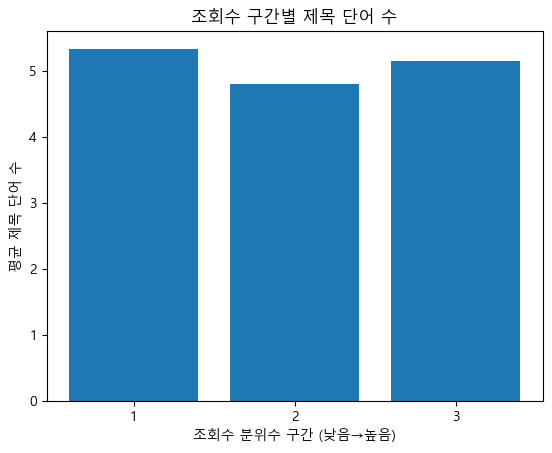

In [146]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_cnt'])
plt.xlabel('Ï°∞ÌöåÏàò Î∂ÑÏúÑÏàò Íµ¨Í∞Ñ (ÎÇÆÏùå‚ÜíÎÜíÏùå)')
plt.ylabel('ÌèâÍ∑† Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.title('Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.show()

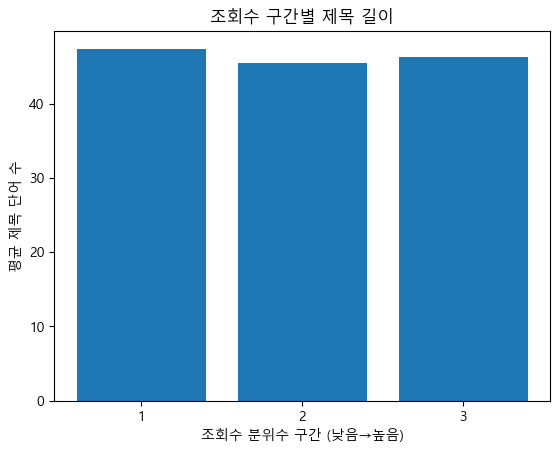

In [150]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_len'])
plt.xlabel('Ï°∞ÌöåÏàò Î∂ÑÏúÑÏàò Íµ¨Í∞Ñ (ÎÇÆÏùå‚ÜíÎÜíÏùå)')
plt.ylabel('ÌèâÍ∑† Ï†úÎ™© Îã®Ïñ¥ Ïàò')
plt.title('Ï°∞ÌöåÏàò Íµ¨Í∞ÑÎ≥Ñ Ï†úÎ™© Í∏∏Ïù¥')
plt.show()

In [149]:
# Î∂ÑÏúÑÏàò Íµ¨Í∞ÑÎ≥ÑÎ°ú title_cnt Î∂ÑÎ¶¨
group1 = game_df[game_df['views_bin'] == 1]['title_cnt']
group2 = game_df[game_df['views_bin'] == 2]['title_cnt']
group3 = game_df[game_df['views_bin'] == 3]['title_cnt']

# ANOVA ÌÖåÏä§Ìä∏
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 4.5585
P-value: 0.0107


### descriptionÍ≥º titleÏóê Í≤πÏπòÎäî Îã®Ïñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏

In [153]:
game_df

title     views   likes  \
131                 L.A. Noire - Nintendo Switch Trailer    154872    7683   
392                 L.A. Noire - Nintendo Switch Trailer    161231    7803   
405                                       Our First Date    224426   17784   
619                                       Our First Date    463992   25840   
652                         Playing CUPHEAD with MatPat!     55460    3871   
...                                                  ...       ...     ...   
40874  Pok√©mon: Let's Go, Pikachu! and Pok√©mon: Let's...   9992803  230507   
40911        The Sims 4 Seasons: Official Reveal Trailer   1749832   77408   
40919  The History of Fortnite Battle Royale - Did Yo...    324219    7840   
40936              LIE DETECTOR TEST WITH MY GIRLFRIEND!   3229540  109945   
40948  Official Call of Duty¬Æ: Black Ops 4 ‚Äî¬†Multipla...  10306119  357079   

                                             description  log_views  \
131    Amid the post-war boom of Hollywood's Golden A...  11.950361   
392    Amid the post-war boom of Hollywood's Golden A...  11.990600   
405    Here's an animation short of our First Date! W...  12.321306   
619    Here's an animation short of our First Date! W...  13.047625   
652    After my appearance on GTLive, MatPat (Game Th...  10.923435   
...                                                  ...        ...   
40874  Return to the Kanto region and experience a cl...  16.117376   
40911  Add weather to your Sims‚Äô lives to tell new st...  14.375031   
40919  Thanks to Skillshare for sponsoring this video...  12.689178   
40936  Talia: https://www.youtube.com/user/nataliahad...  14.987851   
40948  Call of Duty: Black Ops 4 Multiplayer raises t...  16.148248   

       log_views_scaled                                      cleaned_title  \
131           -1.291706                   la noire nintendo switch trailer   
392           -1.265922                   la noire nintendo switch trailer   
405           -1.054013                                               date   
619           -0.588606                                               date   
652           -1.949735                                play cuphead matpat   
...                 ...                                                ...   
40874          1.378417        pokmon let pikachu pokmon let eevee trailer   
40911          0.261964                sims season official reveal trailer   
40919         -0.818290  history fortnite battle royale know game feat ...   
40936          0.654644                       lie detector test girlfriend   
40948          1.398199  official duty black op multiplayer reveal trailer   

                                             cleand_desc  NOUN  PROPN  ADJ  \
131    postwar boom hollywood golden age cole phelp l...     2      4    0   
392    postwar boom hollywood golden age cole phelp l...     2      4    0   
405    here animation short date excited hear think l...     1      0    1   
619    here animation short date excited hear think l...     1      0    1   
652    appearance gtlive matpat game theory play cuph...     1      1    0   
...                                                  ...   ...    ...  ...   
40874  return kanto region experience classic pokmon ...     2      3    0   
40911  add weather sim live tell new story enjoy seas...     3      0    1   
40919  thank skillshare sponsor video people sign lin...     4      1    1   
40936  talia httpswwwyoutubecomusernataliahaddockjosh...     4      0    0   
40948  duty black op multiplayer raise bar famed mult...     6      0    2   

       VERB  INTJ  NUM  has_rank_related  title_cnt  title_len views_bin  
131       0     0    0              True          5         36         1  
392       0     0    0              True          5         36         1  
405       0     0    0             False          1         14         1  
619       0     0    0             False          1         14         1  
652 

In [155]:
# Í≤πÏπòÎäî Îã®Ïñ¥ ÌÉêÏÉâ
game_df['common_words'] = game_df.apply(extract_common_words, axis=1)

In [156]:
# Í∞úÏàòÍπåÏßÄ Í∞ôÏù¥ ÏÑ∏Í∏∞
game_df['n_common_words'] = game_df['common_words'].apply(lambda x: len(x.split()) if x else 0)

In [158]:
game_df['n_common_words']

131      4
392      4
405      1
619      1
652      2
        ..
40874    4
40911    0
40919    6
40936    0
40948    4
Name: n_common_words, Length: 817, dtype: int64

In [169]:
# Ï°∞ÌöåÏàò Íµ¨Í∞ÑÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ 
grouped = game_df.groupby('views_bin').agg({
    'views' : 'mean',
    'n_common_words': 'mean',
    'NOUN' : 'mean',
    'PROPN' : 'mean',
    'VERB' : 'mean',
    'INTJ' : 'mean',
    'NUM' : 'mean'
}).reset_index()

print(grouped)

  views_bin         views  n_common_words      NOUN     PROPN      VERB  INTJ  \
0         1  3.300992e+05        3.032967  2.604396  1.637363  0.769231   0.0   
1         2  1.630028e+06        2.338235  2.691176  1.073529  0.779412   0.0   
2         3  5.910787e+06        2.959559  3.474265  0.591912  0.852941   0.0   

        NUM  
0  0.472527  
1  0.352941  
2  0.312500  


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\2622363220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


-----------------------------------------------------------------------------------------------------------

### ÏµúÏ¢Ö ÏòàÏ∏°

------------------------------------------------------------------------------------------------------

ÌÇ§ÏõåÎìú ÏÇ¨Ï†Ñ Íµ¨Ï∂ï

In [167]:
# Ï°∞ÌöåÏàòÍ∞Ä ÎÜíÏùÄ ÏòÅÏÉÅÏóê ÏûêÏ£º Îì±Ïû•ÌïòÎäî ÌÇ§ÏõåÎìú ÏÇ¨Ï†Ñ Íµ¨Ï∂ï 
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer']

hype_words = ['insane', 'crazy', 'unbelievable', 'god', '1v5', 'clutch']

ÌäπÏßï Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò

In [49]:
def extract_features(row):
    features = {}

    # ÏõêÎ≥∏ ÌÖçÏä§Ìä∏
    title = row['title'] if isinstance(row['title'], str) else ''
    desc = row['description'] if isinstance(row['description'], str) else ''

    # Ï†ÑÏ≤òÎ¶¨Îêú ÌÖçÏä§Ìä∏
    cleaned_title = preprocess_title(title)
    cleaned_desc = preprocess_description(desc)

    # Í≥µÌÜµ Îã®Ïñ¥
    title_words = set(cleaned_title.split())
    desc_words = set(cleaned_desc.split())
    common = title_words & desc_words
    features['n_common_words'] = len(common)
    features['common_words'] = ' '.join(common)

    # Ï†úÎ™© Í∏∏Ïù¥ Î∞è Îã®Ïñ¥ Ïàò 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä (ÏÇ¨Ï†Ñ Ï†ïÏùòÎêú keyword Î¶¨Ïä§Ìä∏ ÌïÑÏöî)
    keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer'
    ]
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # ÎåÄÎ¨∏Ïûê ÎπÑÏú® 30% Ïù¥ÏÉÅ Ïó¨Î∂Ä
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # ÌíàÏÇ¨ Ïπ¥Ïö¥Ìä∏
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò

In [128]:
def compute_rule_score(features):
    score = 0

    # 1. Ï†úÎ™© Í∏∏Ïù¥: ÏßßÏùÑÏàòÎ°ù Í∞ÄÏÇ∞Ï†ê
    score += -0.03 * features['title_len']

    # 2. Îã®Ïñ¥ Ïàò: ÎßéÏùÑÏàòÎ°ù ÌÅ¥Î¶≠ Ïú†ÎèÑ Í∞ÄÎä•ÏÑ± ÏûàÏùå
    score -= 0.3 * features['title_cnt']

    # 3. ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä
    score += 0.5 * features['has_number']

    # 5. Ïà´ÏûêÎ°ú ÏãúÏûë
    score -= 0.1 * features['starts_with_number']

    # 6. ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä
    score += 0.8 * features['has_keyword']

    # 7. ÎåÄÎ¨∏Ïûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Í≤ΩÏö∞
    score -= 0.3 * features['is_caps_heavy']

    # 8. ÌíàÏÇ¨ Í∏∞Î∞ò: Î™ÖÏÇ¨¬∑ÎèôÏÇ¨ ÎßéÏúºÎ©¥ ÎÇ¥Ïö© ÌíçÎ∂Ä, Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Ïò§ÌûàÎ†§ ÏùºÎ∞òÏÑ±‚Üì
    score += 0.5 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Í∞ÄÏ§ëÏπò ÎÇÆÏ∂§

    # 9. Í≥µÌÜµ Îã®Ïñ¥ Í∞úÏàò (titleÍ≥º desc Í∞Ñ overlap)
    score += 0.3 * features.get('n_common_words', 0)

    return score

Ïã§Ï†ú Ï†ÅÏö©Ìï† Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÇ¨Ïö©Ìï† ÏπºÎüºÎßå Î∂àÎü¨Ïò§Í∏∞

In [130]:
game = game_data[['title', 'views', 'description']].copy()

ÌÉÄÍ≤ü Ïä§ÏºÄÏùºÎßÅ

In [131]:
# target scaling
game['log_views'] = np.log1p(game['views'])

scaler = StandardScaler()
game['scaled_views'] = scaler.fit_transform(game[['log_views']])

In [132]:
game = game.drop(columns = ['views', 'log_views'])
game

title  \
131                 L.A. Noire - Nintendo Switch Trailer   
392                 L.A. Noire - Nintendo Switch Trailer   
405                                       Our First Date   
619                                       Our First Date   
652                         Playing CUPHEAD with MatPat!   
...                                                  ...   
40874  Pok√©mon: Let's Go, Pikachu! and Pok√©mon: Let's...   
40911        The Sims 4 Seasons: Official Reveal Trailer   
40919  The History of Fortnite Battle Royale - Did Yo...   
40936              LIE DETECTOR TEST WITH MY GIRLFRIEND!   
40948  Official Call of Duty¬Æ: Black Ops 4 ‚Äî¬†Multipla...   

                                             description  scaled_views  
131    Amid the post-war boom of Hollywood's Golden A...     -1.291706  
392    Amid the post-war boom of Hollywood's Golden A...     -1.265922  
405    Here's an animation short of our First Date! W...     -1.054013  
619    Here's an animation short of our First Date! W...     -0.588606  
652    After my appearance on GTLive, MatPat (Game Th...     -1.949735  
...                                                  ...           ...  
40874  Return to the Kanto region and experience a cl...      1.378417  
40911  Add weather to your Sims‚Äô lives to tell new st...      0.261964  
40919  Thanks to Skillshare for sponsoring this video...     -0.818290  
40936  Talia: https://www.youtube.com/user/nataliahad...      0.654644  
40948  Call of Duty: Black Ops 4 Multiplayer raises t...      1.398199  

[817 rows x 3 columns]

In [133]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 131 to 40948
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         817 non-null    object 
 1   description   803 non-null    object 
 2   scaled_views  817 non-null    float64
dtypes: float64(1), object(2)
memory usage: 25.5+ KB


Ìï®Ïàò Ï†ÅÏö©

In [134]:
game['features'] = game.apply(extract_features, axis=1)

In [135]:
game['rule_score'] = game['features'].apply(compute_rule_score)

### (ÏòàÏ∏° 1) ÏßÄÏàòÌï®ÏàòÎ°ú ÏòàÏ∏°

In [136]:
def score_to_views(score, base=1e5):
    return int(base * np.exp(score / 3))

In [137]:
game['predicted_views'] = game['rule_score'].apply(score_to_views)

In [138]:
game[['title', 'scaled_views', 'rule_score', 'predicted_views']].sort_values(by='scaled_views', ascending=False).head()

title  scaled_views  rule_score  \
34706             Clash Royale: CLAN WARS IS HERE!      1.716454        1.84   
38326  Clash Royale: Meet the Rascals! (New Card!)      1.638720        1.71   
38127  Clash Royale: Meet the Rascals! (New Card!)      1.638378        1.71   
37917  Clash Royale: Meet the Rascals! (New Card!)      1.637270        1.71   
37713  Clash Royale: Meet the Rascals! (New Card!)      1.636549        1.71   

       predicted_views  
34706           184657  
38326           176826  
38127           176826  
37917           176826  
37713           176826

In [139]:
# ÏòàÏ∏°Í∞íÏùÑ log-scaling + standardizationÌïú Í≤ÉÍ≥º ÎßûÏ∂îÎ†§Î©¥:
pred_scaled = np.log1p(game['predicted_views'])
pred_scaled = (pred_scaled - pred_scaled.mean()) / pred_scaled.std()

# Ïã§Ï†úÍ∞í
true_scaled = game['scaled_views']

In [140]:
rmse = mean_squared_error(game['scaled_views'], pred_scaled, squared=False)
r2 = r2_score(true_scaled, pred_scaled)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

üìâ RMSE: 1.1068
üìà R¬≤: -0.2250


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (ÏòàÏ∏° 2) Linear Regression

In [143]:
# X, y Ï†ïÏùò
X = game[['rule_score']]  # ÎèÖÎ¶Ω Î≥ÄÏàò: rule Í∏∞Î∞ò Ï†êÏàò
y = game['scaled_views']  # Ï¢ÖÏÜç Î≥ÄÏàò: log + ÌëúÏ§ÄÌôîÎêú Ï°∞ÌöåÏàò

# ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

RMSE: 0.9220
R¬≤: 0.1499


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Í∞ÄÏ§ëÏπò ÏàòÏ†ïÏùÑ ÏúÑÌïú ÌöåÍ∑ÄÍ≥ÑÏàò ÌôïÏù∏

In [148]:
# ÌîºÏ≤ò Ï∂îÏ∂ú
features_df = game.apply(extract_features, axis=1, result_type='expand')

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y)
X = features_df.drop(columns = 'common_words', errors = 'ignore')  
y = game['scaled_views']

# Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÏÑ±Îä• ÌèâÍ∞Ä
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print("RMSE:", round(rmse, 4))
print("R¬≤:", round(r2, 4))

# Í≥ÑÏàò ÌôïÏù∏
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n Feature Importance (Í≥ÑÏàò):")
print(coefficients)

RMSE: 0.8528
R¬≤: 0.2727

 Feature Importance (Í≥ÑÏàò):
starts_with_number   -1.195872
has_keyword           0.448128
ADJ                   0.434662
title_cnt            -0.354184
num_exclamations      0.331347
VERB                  0.233345
NOUN                  0.211376
NUM                   0.133383
PROPN                 0.105712
is_caps_heavy         0.068243
n_common_words        0.061508
has_number           -0.046178
num_questions         0.029993
title_len            -0.000353
INTJ                  0.000000
dtype: float64


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------

Ï†êÏàò Í∞ÄÏ§ëÏπò ÏàòÏ†ï ÌõÑ Îã§Ïãú ÏòàÏ∏°

In [155]:
def compute_rule_score_modified(features):
    score = 0

    # 1. Ï†úÎ™© Í∏∏Ïù¥: ÏßßÏùÑÏàòÎ°ù Í∞ÄÏÇ∞Ï†ê
    score -= 0.03 * features['title_len']

    # 2. Îã®Ïñ¥ Ïàò: Ï†ÅÏùÑÏàòÎ°ù ÌÅ¥Î¶≠ Ïú†ÎèÑ Í∞ÄÎä•ÏÑ± ÏûàÏùå
    score -= 0.3 * features['title_cnt']

    # 3. ÎäêÎÇåÌëú / Î¨ºÏùåÌëú Í∞úÏàò
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. Ïà´Ïûê Ìè¨Ìï® Ïó¨Î∂Ä
    score -= 0.7 * features['has_number']

    # 5. Ïà´ÏûêÎ°ú ÏãúÏûë
    score -= 0.8 * features['starts_with_number']

    # 6. ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä
    score += 0.8 * features['has_keyword']

    # 7. ÎåÄÎ¨∏Ïûê ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Í≤ΩÏö∞
    score -= 0.3 * features['is_caps_heavy']

    # 8. ÌíàÏÇ¨ Í∏∞Î∞ò: Î™ÖÏÇ¨¬∑ÎèôÏÇ¨ ÎßéÏúºÎ©¥ ÎÇ¥Ïö© ÌíçÎ∂Ä, Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Ïò§ÌûàÎ†§ ÏùºÎ∞òÏÑ±‚Üì
    score += 0.7 * features.get('NOUN', 0)
    score += 0.7 * features.get('VERB', 0)
    score += 0.1 * features.get('PROPN', 0)  # Í≥†Ïú†Î™ÖÏÇ¨ ÎßéÏúºÎ©¥ Í∞ÄÏ§ëÏπò ÎÇÆÏ∂§

    # 9. Í≥µÌÜµ Îã®Ïñ¥ Í∞úÏàò (titleÍ≥º desc Í∞Ñ overlap)
    score += 0.3 * features.get('n_common_words', 0)

    return score

In [156]:
game['rule_score_modified'] = game['features'].apply(compute_rule_score_modified)

In [157]:
# X, y Ï†ïÏùò
X = game[['rule_score_modified']]  # ÎèÖÎ¶Ω Î≥ÄÏàò: rule Í∏∞Î∞ò Ï†êÏàò
y = game['scaled_views']  # Ï¢ÖÏÜç Î≥ÄÏàò: log + ÌëúÏ§ÄÌôîÎêú Ï°∞ÌöåÏàò

# ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÏòàÏ∏°
y_pred = model.predict(X)

# ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

RMSE: 0.9549
R¬≤: 0.0882


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
